# Imports

In [35]:
# System
import os
from dotenv import load_dotenv

# Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database
from sqlalchemy import create_engine

# Configurations

In [36]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# For Korean in plots
plt.rcParams['font.family'] = 'Nanum Gothic'

# For plotting style
plt.style.use('seaborn-v0_8-whitegrid')

# Customizing colors for seaborn
custom_color_palette = ['#008080', '#015A67', '#E2725B', '#FFE5B4', '#40E0D0', '#ADD8E6']
custom_palette = sns.color_palette(custom_color_palette)
sns.set_palette(custom_palette)

# Database Parameters
load_dotenv()
db_params = {
        "host": "127.0.0.1",
        "database": "pinkfong_db",
        "user": "postgres",
        "password": os.environ.get("PASSWORD"),
        "port": "5432",
    }
engine = create_engine(
    f'postgresql://{db_params["user"]}:{db_params["password"]}@{db_params["host"]}/{db_params["database"]}'
)

# Data

The following is simple data from Pink Fong YouTube channel (핑크퐁 (인기 동요・동화)).

In [37]:
query = """
SELECT
    channel_character,
    subscriber_count,
    video_count,
    view_count
FROM channel_stats s
JOIN channel_metadata m
    ON s.channel_id = m.channel_id
"""
df = pd.read_sql(query,con=engine)
df

,channel_character,subscriber_count,video_count,view_count
0,핑크퐁,12700000,3883,8595385929
1,올리,1290000,1351,762284215
2,베베핀,2700000,656,886734933


Let's calculate some metrics for further analysis and gain some insights to see which type of analysis is needed for growth marketing.

**Assess acquisition strategies and alignment with viewers**  
subscriber_to_views (subscriber conversion rate): reflects how effectively a channel converts viewers into subscribers.
- A low ratio could mean the channel is heavily reliant on one-time viewers or viral videos but isn’t building a strong subscriber base.
- A high ratio might indicate effective subscriber acquisition strategies or strong content alignment with the audience’s interests.

**Expand audience base beyond subscribers**  
views_to_subscriber_ratio (channel reach): reflects the overall reach of the channel relative to its subscriber base, furthermore helps assess whether the channel is relying on returning subscribers or attracting a broader audience.
-  A low ratio might indicate content is mainly reaching existing subscribers and struggling to attract new viewers. Indicates a need to expand content's discoverability or appeal to non-subscribers.
- A high ratio might indicate a strong ability to attract new viewers, possibly through viral content or effective marketing.


**Optimize video quality and promotion strategies**  
avg_views_per_video (content effectiveness): shows how well each individual video performs, on average, in attracting viewers, furthermore showing if the channel's content strategy is resonating with its audience.
- A low value might indicate that content volume is high, but individual videos may lack appeal or discoverability (e.g., poor SEO, less engaging thumbnails/titles). A need to focus on quality rather than quantity.
- A high value might indicate strong individual video performance and possibly a good content promotion strategy. Viewers are consistently engagning with the content.

***How to Use These Metrics Together***

Diagnosing Issues:
- Low avg_views_per_video + high views_to_subscriber_ratio: The channel might rely on viral hits but struggle to maintain consistent performance across all videos.
- High avg_views_per_video + low views_to_subscriber_ratio: Indicates strong content but limited appeal outside the subscriber base.

Strategizing for Growth:
- To grow subscribers: Focus on subscriber-to-views ratio and improving CTAs in high-performing videos.
- To increase engagement: Optimize content for views per subscriber by analyzing what resonates most with the audience.
- To expand reach: Improve discoverability and targeting to boost views-to-subscriber ratio.

In [42]:
query_metrics = """
SELECT
    CASE 
        WHEN channel_character = '핑크퐁' THEN 'Pinkfong'
        WHEN channel_character = '올리' THEN 'Ollie'
        WHEN channel_character = '베베핀' THEN 'Bebefinn'
    END AS channel_character,
    subscriber_count,
    video_count,
    view_count,
    subscriber_count::float / view_count AS subscriber_to_views,
    view_count::float / video_count AS avg_views_per_video,
    view_count::float / subscriber_count AS views_to_subscriber_ratio,
    view_count::float / SQRT(subscriber_count * video_count) AS content_impact_score
FROM channel_stats s
JOIN channel_metadata m
    ON s.channel_id = m.channel_id
"""

df_metrics = pd.read_sql(query_metrics,con=engine)
df_metrics

,channel_character,subscriber_count,video_count,view_count,subscriber_to_views,avg_views_per_video,views_to_subscriber_ratio,content_impact_score
0,Pinkfong,12700000,3883,8595385929,0.001478,2.213594e+06,676.802042,38706.136633
1,Ollie,1290000,1351,762284215,0.001692,5.642370e+05,590.917996,18259.731916
2,Bebefinn,2700000,656,886734933,0.003045,1.351730e+06,328.420346,21069.780735


General Observations:
1.	핑크퐁 (Pinkfong):
- Subscriber Count: Largest subscriber base (12.7M).
- Video Count: Produces significantly more videos (3,883) than the others.
- View Count: Has an exceptional total view count (8.6B).
- Avg Views Per Video: Despite having many videos, it maintains a high average (2.21M per video).
- Views-to-Subscribers Ratio: Very high ratio (676.80), indicating wide content reach beyond subscribers.
2.	올리 (Ollie):
- Subscriber Count: Smaller subscriber base (1.29M) compared to 핑크퐁 but close to 베베핀.
- Video Count: Second-highest number of videos (1,351).
- Avg Views Per Video: Lower than 핑크퐁 (564K per video).
- Views-to-Subscribers Ratio: Moderate reach beyond subscribers (590.92).
3.	베베핀 (Bebefinn):
- Subscriber Count: Second-largest (2.7M), surpassing 올리.
- Video Count: Smallest number of videos (656).
- Avg Views Per Video: Strong performance (1.35M per video), despite fewer videos.
- Views-to-Subscribers Ratio: Relatively low (328.42), implying a more focused subscriber engagement.

Insights from the Metrics:
1.	Subscriber-to-Views Ratio:
- 핑크퐁 and 올리 have lower subscriber-to-views ratios than 베베핀. This suggests that 베베핀’s subscribers are more engaged, as they generate more views relative to the subscriber base.
2.	Avg Views Per Video:
- 핑크퐁 dominates in average views per video, indicating that it creates content that is highly popular and widely watched.
- 베베핀’s average views per video are notable, despite a smaller library of videos, hinting at well-targeted or high-quality content.
3.	Views-to-Subscribers Ratio:
- 핑크퐁’s ratio (676.80) is the highest, showing that its content reaches a far broader audience than just its subscribers. This reflects strong content virality or appeal across a wide demographic.
4.	Content Strategy and Impact:
- 핑크퐁’s extensive video library (3,883 videos) suggests a volume-driven strategy to maximize exposure and audience reach.
- 베베핀 focuses on fewer, higher-performing videos, emphasizing quality or targeted content creation.
- 올리 operates somewhere in between these two strategies but with room for optimization in either direction.

Potential Actionable Insights:
1.	For 핑크퐁: Continue leveraging its broad audience reach but consider analyzing video performance to optimize content for higher engagement rates.
2.	For 올리: Experiment with diversifying content to improve avg views per video and expand reach beyond its subscriber base.
3.	For 베베핀: Maintain its focus on high-performing content but explore increasing video production to scale growth.


Bonus: Dashboard Layout

To combine all visualizations into one dashboard, use Matplotlib’s GridSpec:

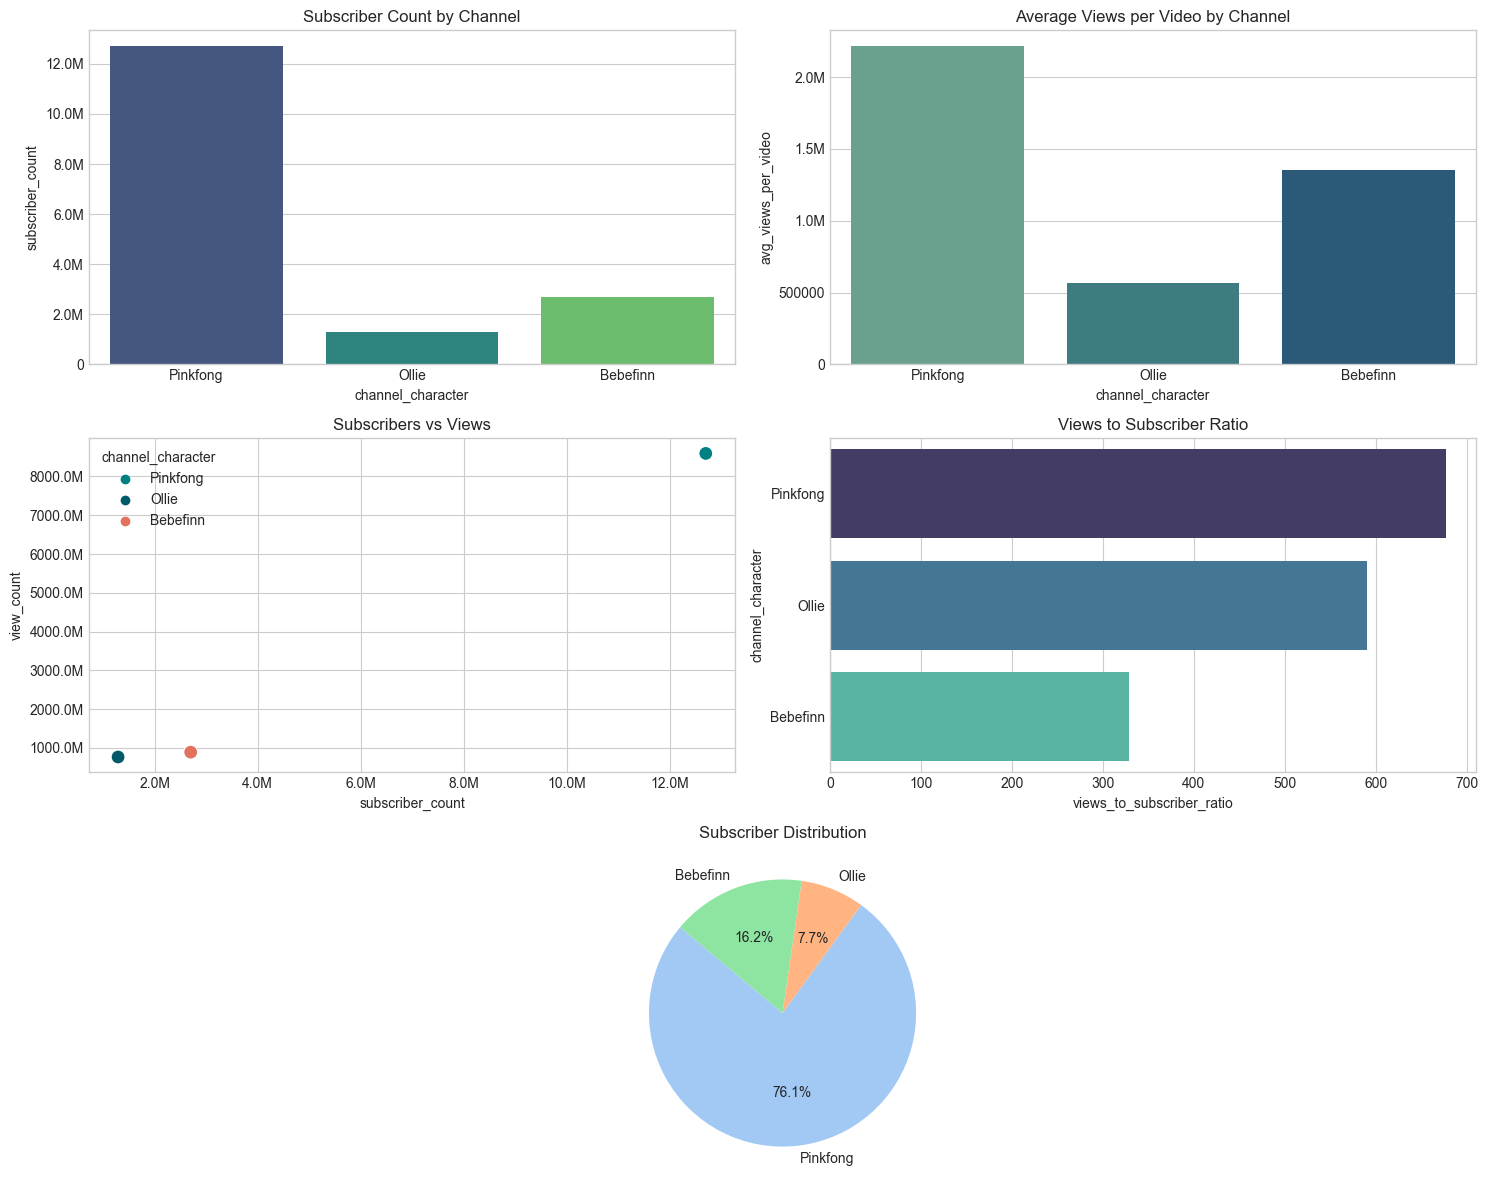

In [43]:
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt

# Function to format y-axis ticks
def millions_formatter(x, _):
    if x >= 1e6:
        return f'{x / 1e6:.1f}M'
    return f'{int(x)}'

fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 2, figure=fig)

# Subscriber Count
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=df_metrics, x='channel_character', y='subscriber_count', palette='viridis', ax=ax1)
ax1.set_title('Subscriber Count by Channel')
ax1.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Average Views per Video
ax2 = fig.add_subplot(gs[0, 1])
sns.barplot(data=df_metrics, x='channel_character', y='avg_views_per_video', palette='crest', ax=ax2)
ax2.set_title('Average Views per Video by Channel')
ax2.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Subscriber vs View Scatter
ax3 = fig.add_subplot(gs[1, 0])
sns.scatterplot(data=df_metrics, x='subscriber_count', y='view_count', hue='channel_character', s=100, ax=ax3)
ax3.set_title('Subscribers vs Views')
ax3.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax3.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Views to Subscriber Ratio
ax4 = fig.add_subplot(gs[1, 1])
df_sorted = df_metrics.sort_values(by='views_to_subscriber_ratio', ascending=False)
sns.barplot(data=df_sorted, y='channel_character', x='views_to_subscriber_ratio', palette='mako', ax=ax4)
ax4.set_title('Views to Subscriber Ratio')

# Pie Chart
ax5 = fig.add_subplot(gs[2, :])
ax5.pie(
    df_metrics['subscriber_count'], 
    labels=df_metrics['channel_character'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel')
)
ax5.set_title('Subscriber Distribution')

plt.tight_layout()
plt.show()